# Machine Learning Project 2019
## Author; Shane Canny
## Project Title; Analysis of the Boston House Price Data Set

In [1]:
## Importing the required libraries for required for later analysis##
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import seaborn as sns

In [2]:
## Importing the data set from the internal sklearn library within Pythion ##

from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
## As the file is a dictionary, printing the dictionary keys ##

x=boston.keys()
print (x)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
## Printing each of the keys to understand what is included in the keys ##

print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [5]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
## Location of where the data set was retrived from i.e. the Anaconda Packaged installed on my machine 
print(boston.filename)

C:\Users\Shane\Anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


In [9]:
## For later manipluation creating a pandas dataframe of the data set, setting the variable as house ##

house = pd.DataFrame(boston.data)

In [10]:
## Printing the data to see format ##

print(house)

           0     1      2    3      4      5      6       7     8      9   \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009   82.9  6.2267   5.0  311.0   

In [11]:
## Setting each column to its correct designation ##

house.columns=boston.feature_names

In [12]:
print(house)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [13]:
## Adding the 14th Column i.e. target to Price

house['PRICE'] = boston.target

In [14]:
## Print the house dataframe to ensure headings are aligned with column data
print(house)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267   

In [54]:
## Creating a new DataFrame of the original house price ##
Original_House_Price=house['PRICE']

## Renaming Columns Names for Clarity ##
Original_House_Price.columns = ['Combined Price of Houses']
print(Original_House_Price)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
30     12.7
31     14.5
32     13.2
33     13.1
34     13.5
35     18.9
36     20.0
37     21.0
38     24.7
39     30.8
40     34.9
41     26.6
42     25.3
43     24.7
44     21.2
45     19.3
46     20.0
47     16.6
48     14.4
49     19.4
50     19.7
51     20.5
52     25.0
53     23.4
54     18.9
55     35.4
56     24.7
57     31.6
58     23.3
59     19.6
60     18.7
61     16.0
62     22.2
63     25.0
64     33.0
65     23.5
66     19.4
67     22.0
68     17.4
69     20.9
70     24.2
71     21.7
72     22.8
73     23.4
74     24.1
75     21.4
76     20.0
77     20.8
78     21.2
79     20.3
80     28.0
81     23.9
82     24.8
83  

In [15]:
## Exporting the dataframe to an external location as a .csv file

export_csv=house.to_csv(r'C:\Users\Shane\Desktop\2019 Projects\Machine Learning\bostonhouse.csv')

In [16]:
## List Descriptive Statistics of the dataframe ##

house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
## Check to ensure the Charles River Dummy Variable has both 1 and 0 ##
print(house.CHAS.to_string(index=False))

 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0


In [18]:
%matplotlib inline

C:\Users\Shane\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


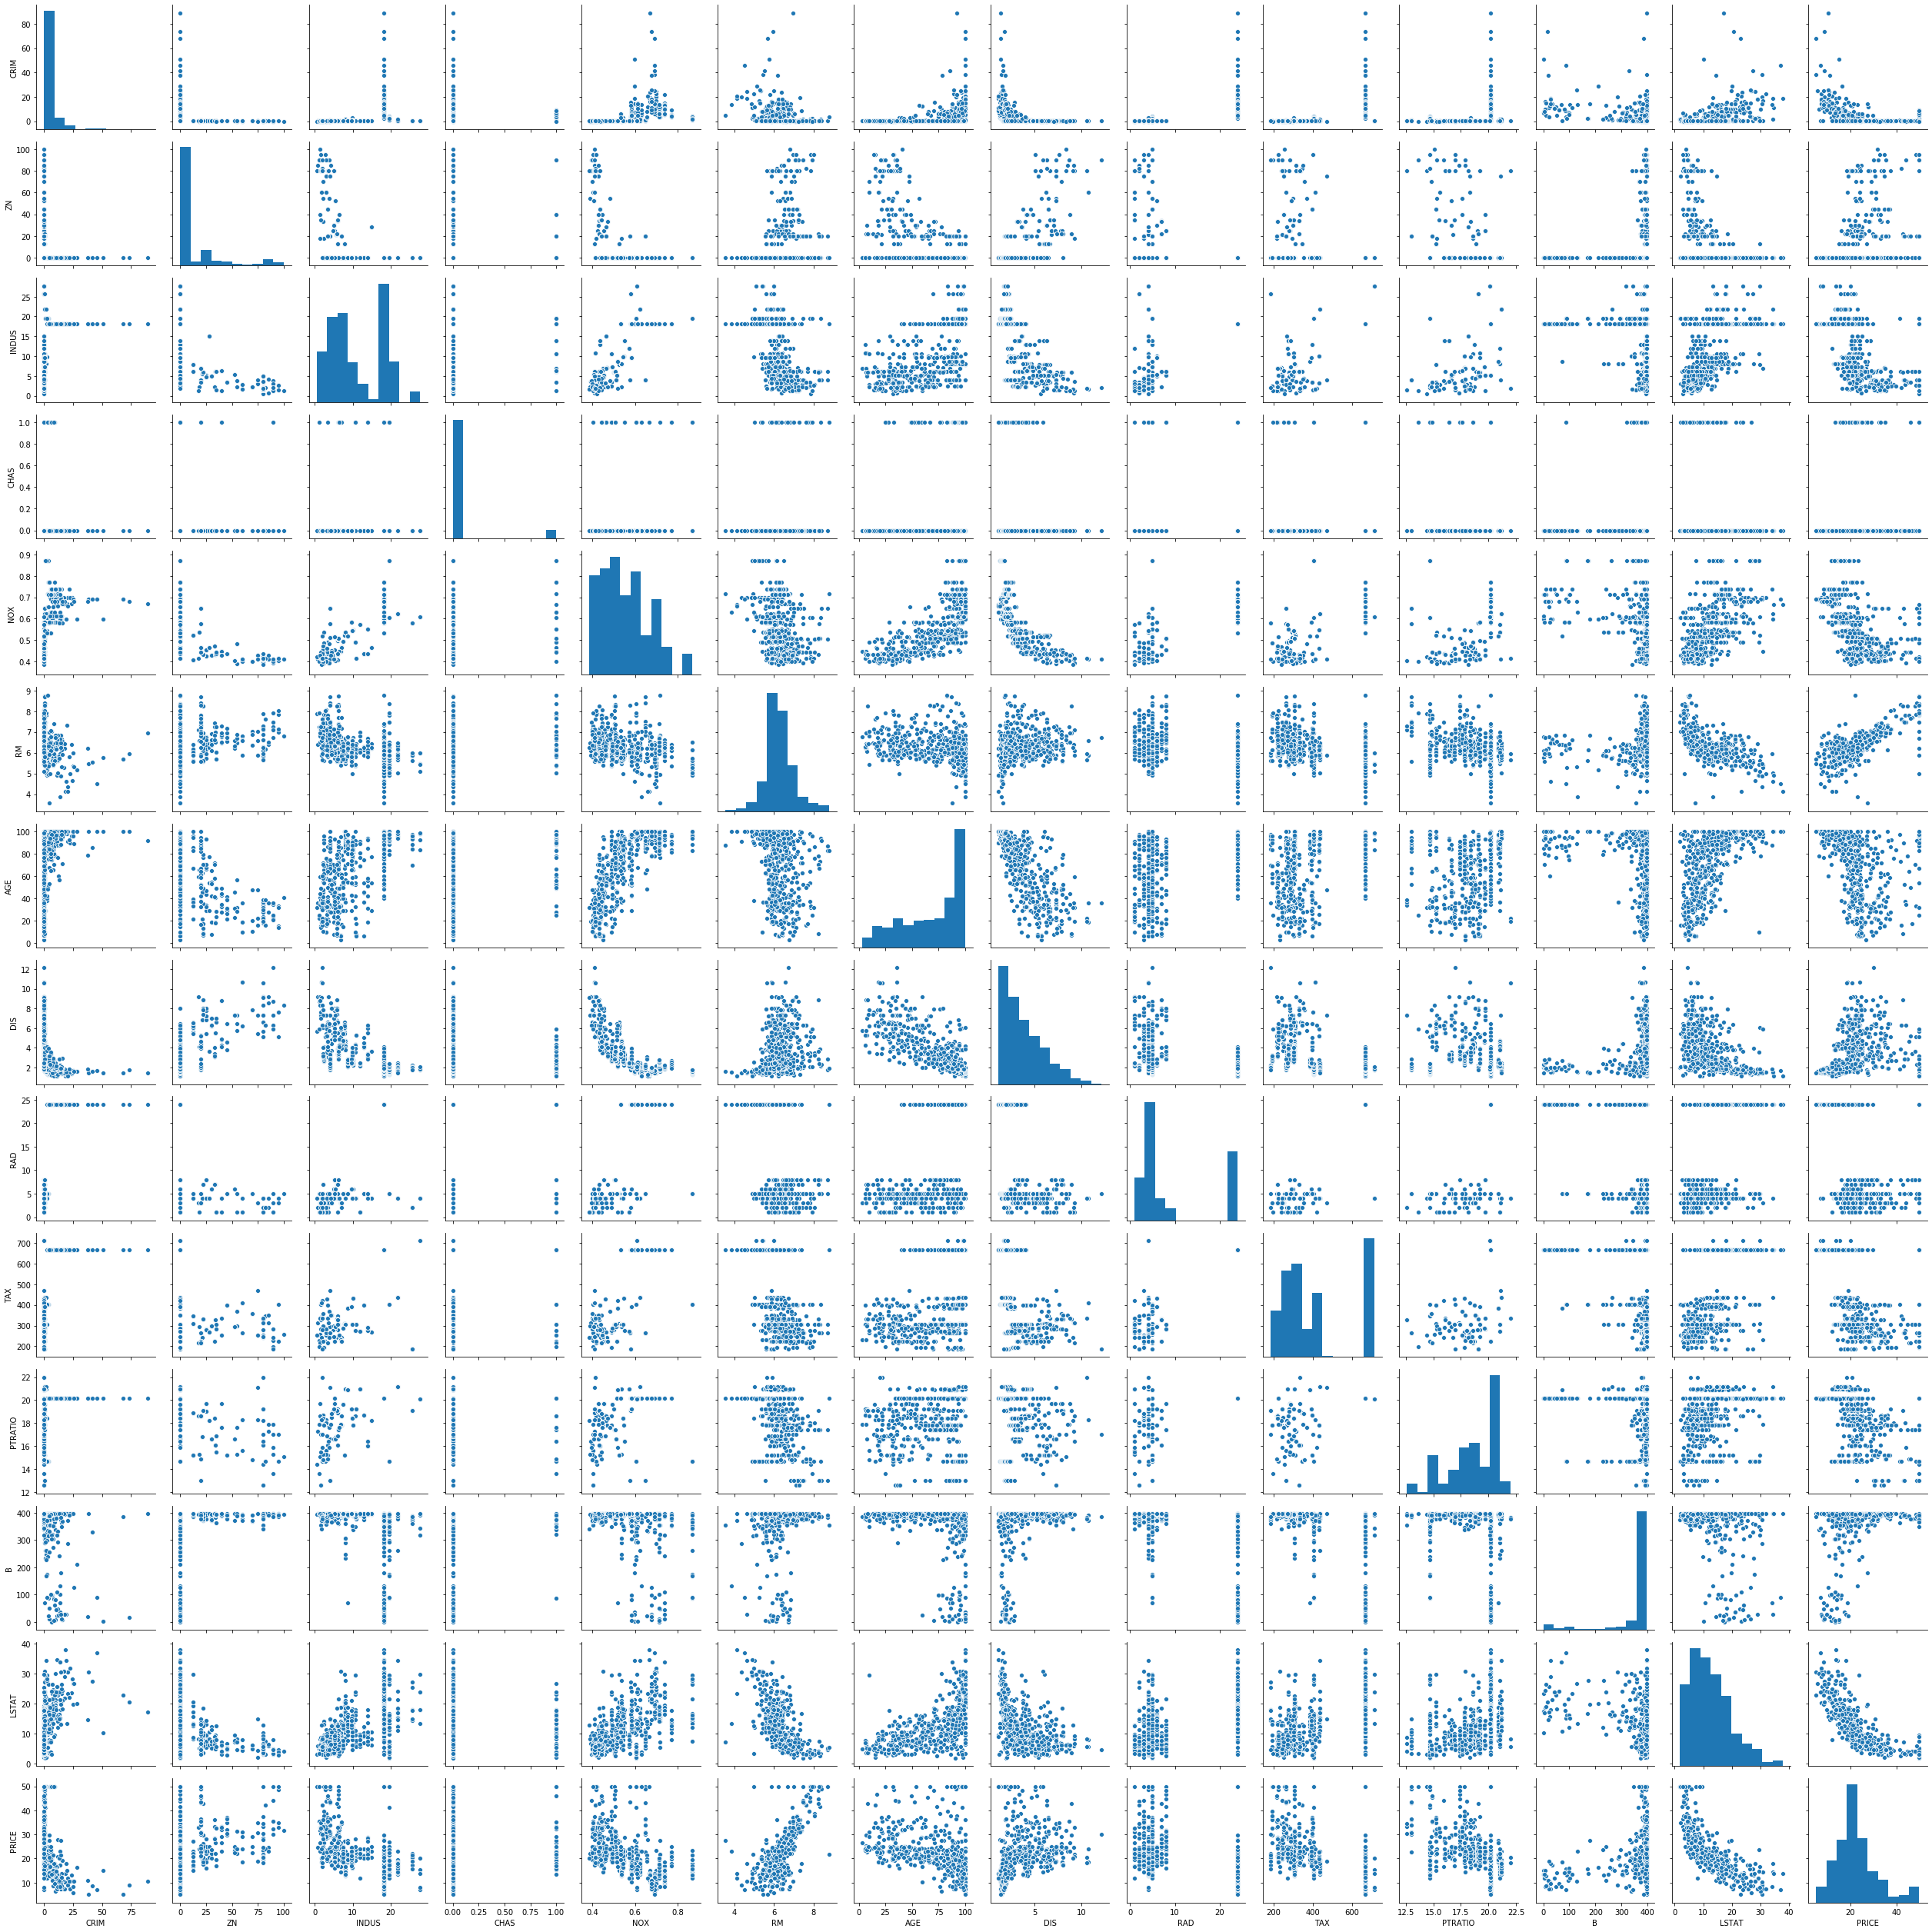

In [19]:
## Creating a Pair Plot for all the house data ##
sns.pairplot(house, size=2.5)
plt.tight_layout()

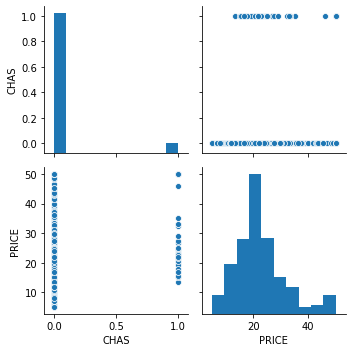

In [20]:
sns.pairplot(house, vars=["CHAS","PRICE"], size=2.5)
plt.tight_layout()

In [21]:
## Creating a new DataFrame for the price of houses ##

river_house_price = pd.DataFrame(house, columns = ['CHAS', 'PRICE'])  
print(river_house_price)

     CHAS  PRICE
0     0.0   24.0
1     0.0   21.6
2     0.0   34.7
3     0.0   33.4
4     0.0   36.2
5     0.0   28.7
6     0.0   22.9
7     0.0   27.1
8     0.0   16.5
9     0.0   18.9
10    0.0   15.0
11    0.0   18.9
12    0.0   21.7
13    0.0   20.4
14    0.0   18.2
15    0.0   19.9
16    0.0   23.1
17    0.0   17.5
18    0.0   20.2
19    0.0   18.2
20    0.0   13.6
21    0.0   19.6
22    0.0   15.2
23    0.0   14.5
24    0.0   15.6
25    0.0   13.9
26    0.0   16.6
27    0.0   14.8
28    0.0   18.4
29    0.0   21.0
..    ...    ...
476   0.0   16.7
477   0.0   12.0
478   0.0   14.6
479   0.0   21.4
480   0.0   23.0
481   0.0   23.7
482   0.0   25.0
483   0.0   21.8
484   0.0   20.6
485   0.0   21.2
486   0.0   19.1
487   0.0   20.6
488   0.0   15.2
489   0.0    7.0
490   0.0    8.1
491   0.0   13.6
492   0.0   20.1
493   0.0   21.8
494   0.0   24.5
495   0.0   23.1
496   0.0   19.7
497   0.0   18.3
498   0.0   21.2
499   0.0   17.5
500   0.0   16.8
501   0.0   22.4
502   0.0   20

In [40]:

## Creating a dataframe of house and prices that are not along the river ##
house_away_from_river=river_house_price[river_house_price.CHAS == 0]

## Renaming Columns Names for Clarity ##

house_away_from_river.columns = ['CHAS', 'Price of House Not Along River']
print(house_away_from_river)

## Listing Summary Statistics for Price of House ot along the river ##
house_away_from_river.describe()

     CHAS  Price of House Not Along River
0     0.0                            24.0
1     0.0                            21.6
2     0.0                            34.7
3     0.0                            33.4
4     0.0                            36.2
5     0.0                            28.7
6     0.0                            22.9
7     0.0                            27.1
8     0.0                            16.5
9     0.0                            18.9
10    0.0                            15.0
11    0.0                            18.9
12    0.0                            21.7
13    0.0                            20.4
14    0.0                            18.2
15    0.0                            19.9
16    0.0                            23.1
17    0.0                            17.5
18    0.0                            20.2
19    0.0                            18.2
20    0.0                            13.6
21    0.0                            19.6
22    0.0                         

,CHAS,Price of House Not Along River
count,471.0,471.000000
mean,0.0,22.093843
std,0.0,8.831362
min,0.0,5.000000
25%,0.0,16.600000
50%,0.0,20.900000
75%,0.0,24.800000
max,0.0,50.000000


In [58]:
## Creating a dataframe of houses and prices that are along the river ##
house_along_river=river_house_price[river_house_price.CHAS == 1]

## Renaming Columns Names for Clarity ##

house_along_river.columns = ['CHAS', 'Price of House Along River']
print(house_along_river)

## Listing Summary Statistics for Price of Houses along the river ##
house_along_river.describe()

     CHAS  Price of House Along River
142   1.0                        13.4
152   1.0                        15.3
154   1.0                        17.0
155   1.0                        15.6
160   1.0                        27.0
162   1.0                        50.0
163   1.0                        50.0
208   1.0                        24.4
209   1.0                        20.0
210   1.0                        21.7
211   1.0                        19.3
212   1.0                        22.4
216   1.0                        23.3
218   1.0                        21.5
219   1.0                        23.0
220   1.0                        26.7
221   1.0                        21.7
222   1.0                        27.5
234   1.0                        29.0
236   1.0                        25.1
269   1.0                        20.7
273   1.0                        35.2
274   1.0                        32.4
276   1.0                        33.2
277   1.0                        33.1
282   1.0   

,CHAS,Price of House Along River
count,35.0,35.000000
mean,1.0,28.440000
std,0.0,11.816643
min,1.0,13.400000
25%,1.0,21.100000
50%,1.0,23.300000
75%,1.0,33.150000
max,1.0,50.000000


In [59]:
## Setting the option to display all rows to ensure all data is present ##
pd.set_option('display.max_rows', None)

## Creating a new table pf Price of Housing ##
Price_of_Housing = pd.concat([house_away_from_river,house_along_river,Original_House_Price], axis=1)
print(Price_of_Housing)
Price_of_Housing.describe()

     CHAS  Price of House Not Along River  CHAS  Price of House Along River  \
0     0.0                            24.0   NaN                         NaN   
1     0.0                            21.6   NaN                         NaN   
2     0.0                            34.7   NaN                         NaN   
3     0.0                            33.4   NaN                         NaN   
4     0.0                            36.2   NaN                         NaN   
5     0.0                            28.7   NaN                         NaN   
6     0.0                            22.9   NaN                         NaN   
7     0.0                            27.1   NaN                         NaN   
8     0.0                            16.5   NaN                         NaN   
9     0.0                            18.9   NaN                         NaN   
10    0.0                            15.0   NaN                         NaN   
11    0.0                            18.9   NaN     

,CHAS,Price of House Not Along River,CHAS,Price of House Along River,PRICE
count,471.0,471.000000,35.0,35.000000,506.000000
mean,0.0,22.093843,1.0,28.440000,22.532806
std,0.0,8.831362,0.0,11.816643,9.197104
min,0.0,5.000000,1.0,13.400000,5.000000
25%,0.0,16.600000,1.0,21.100000,17.025000
50%,0.0,20.900000,1.0,23.300000,21.200000
75%,0.0,24.800000,1.0,33.150000,25.000000
max,0.0,50.000000,1.0,50.000000,50.000000
